# **TASK 2 - TO EXPLORE SUPERVISED MACHINE LEARNING**

# **Supervised learning**

Supervised learning is the machine learning task of learning a function that maps an input to an output based on example input-output pairs.

Regression and classification algorithms fall under this category
The past data is divided into training and testing data sets for building the model

#### **Past data with labels is used for building the model**

Example:

**Regression:** Machine is trained to predict some value like price, weight or height.

*   predicting house/property price
*   predicting stock market price

**Classification:** Machine is trained to classify something into some class.

*   classifying whether a patient has disease or not
*   classifying whether an email is spam or not

## **Linear Regression:**
Linear regression is one of the easiest and most popular Machine Learning algorithms. 

It is a statistical method that is used for predictive analysis. Linear regression makes predictions for continuous/real or numeric variables such as sales, salary, age, product price, etc.

Linear regression algorithm shows a linear relationship between a dependent (y) and one or more independent (y) variables, hence called as linear regression.

Since linear regression shows the linear relationship, which means it finds how the value of the dependent variable is changing according to the value of the independent variable.

## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions.

We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. 

This is a simple linear regression task as it involves just two variables.

In [21]:
# Importing all the required libraries 

import numpy as np # to perform calculations 
import pandas as pd # to read data
import matplotlib.pyplot as plt # to visualise
import seaborn as sns # to visualise

# Reading data from remote link

In [22]:
url = "http://bit.ly/w-data"

data = pd.read_csv(url)

print("Data imported successfully")

Data imported successfully


# Let's have a look at what our data is like

In [23]:
data.shape

(25, 2)

In [24]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [25]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [27]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Let's plot our data points, so that we can have a better understanding of our data and it's distribution

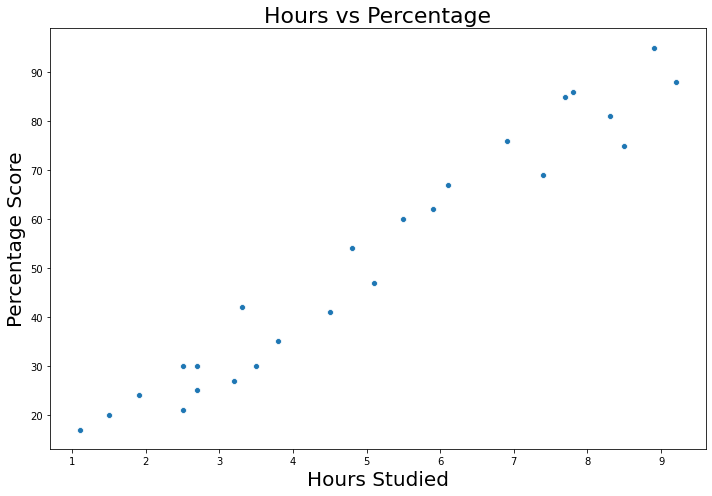

In [28]:
# Plotting the distribution of scores

plt.figure(figsize=(10,7))

sns.scatterplot(x='Hours', y='Scores', data=data)

plt.title('Hours vs Percentage', fontsize=22) 
plt.xlabel('Hours Studied', fontsize=20)  
plt.ylabel('Percentage Score', fontsize=20)  
plt.tight_layout()

#### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

# Preparing the data

In this step we divide the data into "attributes" (inputs) and "labels" (outputs).

In [29]:
# Setting variables

X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [30]:
# Splitting the data

# import SK Learn train test split
from sklearn.model_selection import train_test_split 

# Assign variables to capture train test split output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [31]:
# checking the size of train and test data

print('Shape of X_train: ',X_train.shape)
print('Shape of y_train: ',y_train.shape)

print('\n')

print('Shape of X_test: ',X_test.shape)
print('Shape of y_test: ',y_test.shape)

Shape of X_train:  (17, 1)
Shape of y_train:  (17,)


Shape of X_test:  (8, 1)
Shape of y_test:  (8,)


# Training the Algorithm

After splitting the data into training and testing sets, finally, the time is to train our algorithm. 

Firstly, importing of sklearn.linear_model is required for us to access LinearRegression.

It then needs to be instantiated and model fit to our training data. 

In [32]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, y_train)

print("Training complete.")

Training complete.


In [33]:
# Interpreting Coefficients

# prints y-intercept
print('y-intercept: ',regressor.intercept_)

print('\n')

# prints the coefficient
print('coefficient: ',regressor.coef_)

y-intercept:  2.3708153823418883


coefficient:  [9.78856669]


# Visualizing the Regression Line

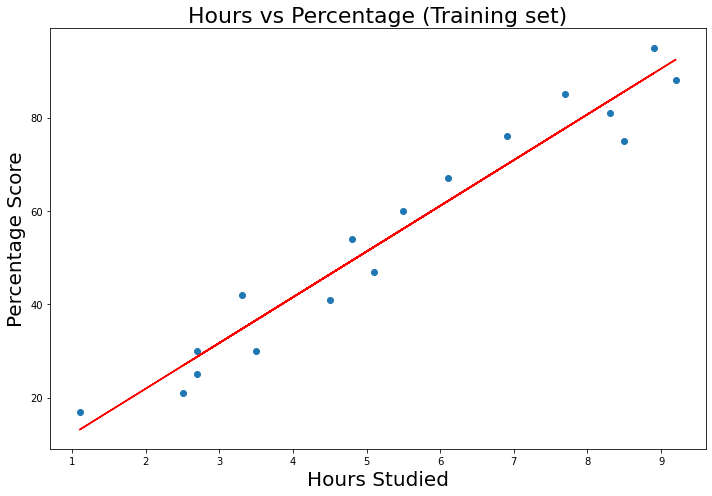

In [34]:
plt.figure(figsize=(10,7))

plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), color = "r")

plt.title('Hours vs Percentage (Training set)', fontsize=22) 
plt.xlabel('Hours Studied', fontsize=20)  
plt.ylabel('Percentage Score', fontsize=20)
plt.tight_layout()

# Making predictions based on the model

Now that we have trained our algorithm, it’s time to make some predictions. 

To do so, we will use our test data and see how accurately our algorithm predicts the scores.


In [35]:
# Making Predictions

print(X_test) # Testing data - In Hours

y_pred = regressor.predict(X_test) # Predicting the scores

print('\n')
print('Prediction completed Sucessfully.')

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


Prediction completed Sucessfully.


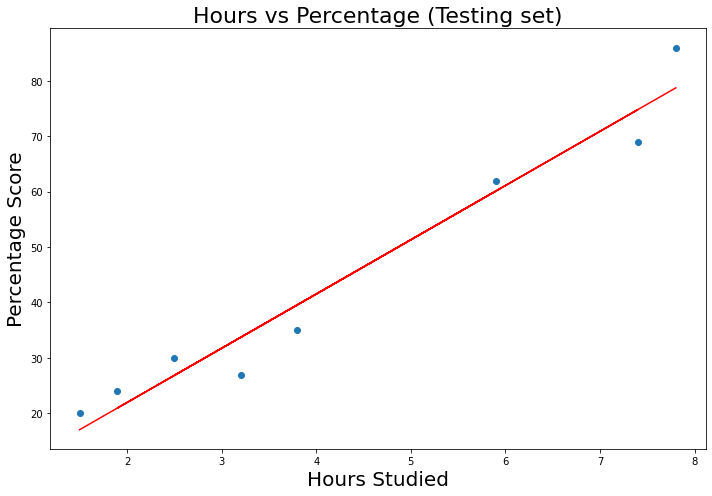

In [36]:
plt.figure(figsize=(10,7))

plt.scatter(X_test, y_test)
plt.plot(X_test, regressor.predict(X_test), color = "r")

plt.title('Hours vs Percentage (Testing set)', fontsize=22) 
plt.xlabel('Hours Studied', fontsize=20)  
plt.ylabel('Percentage Score', fontsize=20)
plt.tight_layout()

In [37]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


<Figure size 1008x648 with 0 Axes>

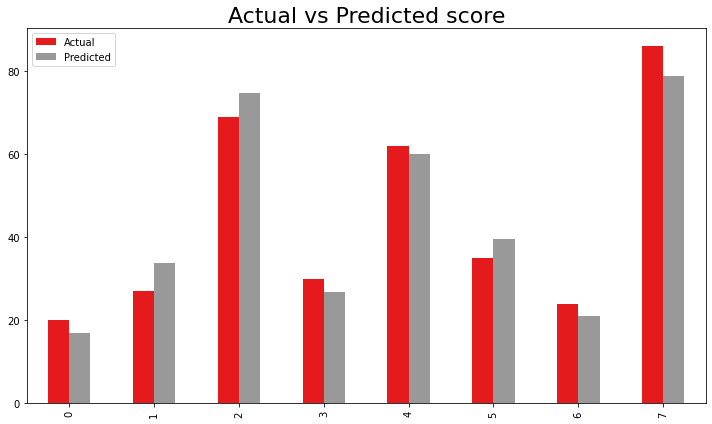

In [38]:
plt.figure(figsize=(14,9))

df.plot(kind='bar', figsize=(10,6), cmap="Set1")

plt.title('Actual vs Predicted score', fontsize=22)  
plt.tight_layout()

In [39]:
# You can also test with your own data

hours = 9.25
own_pred = regressor.predict([[hours]])

print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.91505723477056


# Evaluating the model

The final step is to evaluate the performance of algorithm. 

This step is particularly important to compare how well different algorithms perform on a particular dataset. 

For simplicity here, we have chosen the mean square error. There are many such metrics.

In [40]:
from sklearn import metrics  
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error:  4.419727808027651
